## Linear Regression credit card and bank balances
---
**Elo notes**


### Decision Trees


* [From Sklearn - Decision Trees](http://scikit-learn.org/stable/modules/tree.html)


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. 

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Some advantages of decision trees are:

        Simple to understand and to interpret. Trees can be visualised.
        Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
        The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
        Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
        Able to handle multi-output problems.
        Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
        Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
        Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

        Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
        Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
        The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
        There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
        Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.





---
### Useful links
#### Numpy Resources

* [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
* [Numpy Routines](https://docs.scipy.org/doc/numpy/reference/routines.html#routines)
* [NumPy: creating and manipulating numerical data](https://scipy-lectures.github.io/intro/numpy/index.html)
* [Numpy Linear Algebra](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html)
* [Scipy-Numpy LECTURE](http://www.scipy-lectures.org/intro/numpy/array_object.html#what-are-numpy-and-numpy-arrays)
* [N-dimensional array](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)
* [Numpy Scientific Python Lectures](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
* [Numpy Broadcasting](http://wiki.scipy.org/EricsBroadcastingDoc)
* [Very Basic Numpy array dimension visualization](https://stackoverflow.com/questions/48200911/very-basic-numpy-array-dimension-visualization)
* [Crash Course in Python for Scientist](http://nbviewer.ipython.org/gist/rpmuller/5920182)

#### In NumPy dimensions are called axes. The number of axes is rank.

In an numpy array, a **row vector** is defined as:

```python
a = np.array([[1, 2, 3]])
```
The shape of `a` is `(1, 3)`.

A **column vector** is defined as:
```python
b = np.array([[1], [2], [3]])
```
The shape of `b` is `(3, 1)`.

Check the `shape` of all the vectors. If the shape is missing a value, i.e. `(3,)` or  `(,3)`.


```
import numpy as np

row_vector = np.arange(0, 10, 1).reshape(1, 10)

print row_vector
>>> [[0 1 2 3 4 5 6 7 8 9]]

print row_vector.shape
>>> (1, 10)

col_vector = np.linspace(100, 300, 3).reshape(3,1)

print col_vector
>>> [[ 100.]
    [ 200.]
    [ 300.]]

print col_vector.shape
>>> (3, 1)

```

[[:, 0] from a multidimentional vector to a List of column axis= 1, Index=0 ](https://stackoverflow.com/questions/38556674/why-do-numpy-array-arr2d-1-and-arr2d-0-produce-different-results)

#### Rows and Columns

`y : m == rows == (axis=0)`

`x : n == columns == (axis=1)`

`(row, col) == (m, n) == (axis=0, axis=1) == (-y, x)`

#### Tensor

Create a random 3D tensor, 3 rows and 4 columns (you should create a Matrix except there's an extra dimension)

#### Vector in Matrix Form
A **column vector** is a matrix with $n$ rows and 1 column and to differentiate from a standard matrix $X$ of higher dimensions can be denoted as a bold lower case $\boldsymbol{x}$

$$
\boldsymbol{x} =
  \begin{bmatrix}
    x_{1}\\
    x_{2}\\
    \vdots\\
    x_{n}
  \end{bmatrix}
$$

and a **row vector** is generally written as the transpose

$$\boldsymbol{x}^T = [x_1, x_2, \ldots, x_n]$$


#### [Numpy Matrix reshaped into a vector](https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa)

```
Row_vector.shape
>> (1, n)

Column_vector.shape
>> (n, 1)
```

#### Scikit-Learn

* [sklearn - User guide](http://scikit-learn.org/stable/user_guide.html#user-guide)

* [Sklearn - API Reference](http://scikit-learn.org/stable/modules/classes.html)

* [Model selection and evaluation](http://scikit-learn.org/stable/model_selection.html)
    * [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)

* [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

* [Machine Learning in Python](http://scikit-learn.org/stable/)

* [Dataset API](http://scikit-learn.org/stable/datasets/index.html)

* [Metrics - Pairwise](http://scikit-learn.org/stable/modules/metrics.html)

#### Pandas

[Pandas ecosystem](http://pandas.pydata.org/pandas-docs/version/0.15.0/ecosystem.html#ecosystem-visualization)

[Pandas](https://pandas.pydata.org/)

using the column names
df.loc[:, [‘colname0’, ‘colname1’]]
df[[]] # double bracket

using the column indices
df.iloc[:, [0, 1]]


In [1]:
from __future__ import division

import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
from sklearn.tree import DecisionTreeRegressor as DTR
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from prettytable import PrettyTable

%matplotlib inline

### 'y' : df.Balance

In [6]:
df = pd.read_csv('balance.csv', index_col=0)

In [7]:
df[:2]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


### Initial Visual Inspection

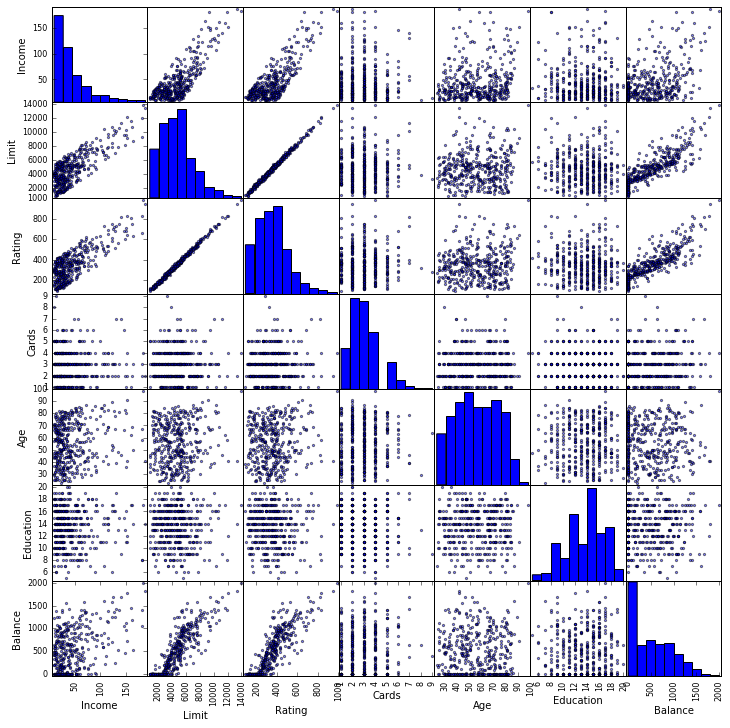

In [10]:
scatter_matrix(df, figsize=(12,12));

##### Though visual inspection of the Scatter Matrix df presents strong multicolinearity among features 'Limit' and 'Rating'. These two features also present observations heavily present around 0 (zero) point. 

#### 'y' variable df.Balance will require further analysis and a threshold for prediction due to the skew shape towards 0(zero) 

---
#### Categorical to binary

Col: ['Gender', 'Married', 'Student']

In [11]:
df.Gender.unique() # Check out the space!

array([' Male', 'Female'], dtype=object)

In [12]:
df.Married.unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df.Gender = df.Gender.apply(lambda x: 1 if x.strip().lower() == 'male' else 0) # Check out the space!
df.Married = df.Married.map({'No':0, 'Yes':1})
df.Student = df.Student.map({'No':0, 'Yes':1})

In [14]:
df[:4]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
2,106.025,6645,483,3,82,15,0,1,1,Asian,903
3,104.593,7075,514,4,71,11,1,0,0,Asian,580
4,148.924,9504,681,3,36,11,0,0,0,Asian,964


In [15]:
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns= ['Ethnicity'])

In [17]:
df.drop('Ethnicity_African American', axis=1, inplace=True)

In [18]:
df[:2]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0


In [19]:
df.columns

Index([u'Income', u'Limit', u'Rating', u'Cards', u'Age', u'Education',
       u'Gender', u'Student', u'Married', u'Balance', u'Ethnicity_Asian',
       u'Ethnicity_Caucasian'],
      dtype='object')

### Model - OLS

#### Obtaining y and X vectors 


In [20]:
y = df.Balance
X = df.drop(['Balance'], axis=1)

In [21]:
model = sm.OLS(y, sm.add_constant(X)).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 10 Jul 2018   Prob (F-statistic):          1.11e-253
Time:                        10:57:45   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -489.8611     35.801    -13.683      0.000      -560.250  -419.473
Income                 -7.8031      0.234    -33.314      0.000        -8.264    -7.343
Limit                   0.1909      0.033      5.824      0.000         0.126     0.255
Rating                  1.1365      0.491      2.315      0.021         0.171     2.102
Cards                  17.7245      4.341      4.083      0.000         9.190    26.259
Age                    -0.6139      0.294     -2.088      0.037        -1.192    -0.036
Education              -1.0989      1.598     -0.688      0.492        -4.241     2.043
Gender                 10.6532      9.914      1.075      0.283        -8.839    30.145
Student               425.7474     16.723     25.459      0.000       392.869   458.626
Married                -8.5339     10.363     -0.824      0.411       -28.908    11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235       -10.955    44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408       -13.899    34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

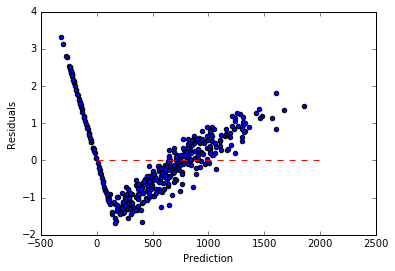

In [23]:
plt.scatter(model.fittedvalues, model.outlier_test().student_resid)
plt.hlines(0,0, 2000, linestyles='--', color='r')
plt.xlabel('Prediction')
plt.ylabel('Residuals');

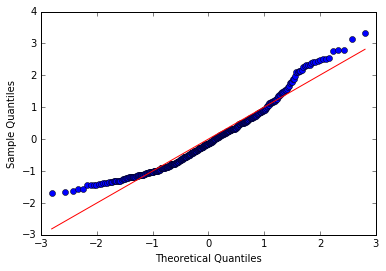

In [24]:
sm.qqplot(model.outlier_test().student_resid, line='s');

The V shape of the residual scatter graph is the result of some features with an umbalance observation with tendency around the 0(zero) point.

### 'y' variable analysis

'y' variable df.Balance will require further analysis and a threshold for prediction due to the skew shape towards 0(zero) 

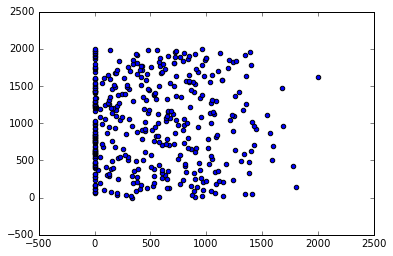

In [40]:
x_eval = np.linspace(0, 2000, 400)
plt.scatter(y, x_eval);

Model is not to be trusted because of the lack of homoscedastcity in residuals. 

In [25]:
m = X.as_matrix()

pretty = PrettyTable(['Field', 'VIF'])

for i in xrange(m.shape[1]):
    pretty.add_row((X.columns[i], vif(m, i)))

print pretty

+---------------------+---------------+
|        Field        |      VIF      |
+---------------------+---------------+
|        Income       | 7.21447071671 |
|        Limit        | 1083.25649076 |
|        Rating       | 1281.44400533 |
|        Cards        | 8.18534311235 |
|         Age         | 9.69586404024 |
|      Education      | 12.1105811096 |
|        Gender       | 1.90491500099 |
|       Student       | 1.14582427744 |
|       Married       | 2.66365177214 |
|   Ethnicity_Asian   | 1.96400254648 |
| Ethnicity_Caucasian | 2.83753746288 |
+---------------------+---------------+


### Option 1 - Removing features that are highly correlated in order to avoid multicollinearity

In [91]:
Xop1 = df.drop(['Balance', 'Limit', 'Education'], axis=1)

In [92]:
modelop1 = sm.OLS(y, sm.add_constant(Xop1)).fit()
modelop1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     844.1
Date:                Tue, 10 Jul 2018   Prob (F-statistic):          1.53e-249
Time:                        14:10:53   Log-Likelihood:                -2415.5
No. Observations:                 400   AIC:                             4851.
Df Residuals:                     390   BIC:                             4891.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -565.1692     26.945    -20.975      0.000      -618.144  -512.194
Income                 -7.7736      0.244    -31.918      0.000        -8.252    -7.295
Rating                  3.9790      0.055     72.422      0.000         3.871     4.087
Cards                   4.0087      3.784      1.059      0.290        -3.430    11.447
Age                    -0.6429      0.306     -2.103      0.036        -1.244    -0.042
Gender                 10.6827     10.312      1.036      0.301        -9.591    30.956
Student               416.1403     17.266     24.101      0.000       382.194   450.087
Married               -15.2493     10.698     -1.425      0.155       -36.282     5.783
Ethnicity_Asian        21.7592     14.660      1.484      0.139        -7.063    50.581
Ethnicity_Caucasian    10.7327     12.695      0.845      0.398       -14.226    35.692
==============================================================================
Omnibus:                       15.743   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.884
Skew:                           0.492   Prob(JB):                     0.000216
Kurtosis:                       2.791   Cond. No.                     2.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Option 2 - Feature engineering
#### Model - Decision Trees for regression

Evaluating features 'Limit' and 'Rating' for 0(zero) threshold values

In [93]:
# My function for evaluating the threshold in Limit is dt_rmodel
dt_rmodel = DTR().fit(df[['Limit']], y)

x_evaluation = np.arange(0, 15000, 100)

# Evaluating function
predictions = [dt_rmodel.predict(prediction) for prediction in x_evaluation]

# [:, 0] make a List of the first column
limit_threshold = x_evaluation[np.argwhere(np.array(predictions) > 0)[:, 0]]

In [136]:
limit_threshold[np.argmin(limit_threshold)]

1200

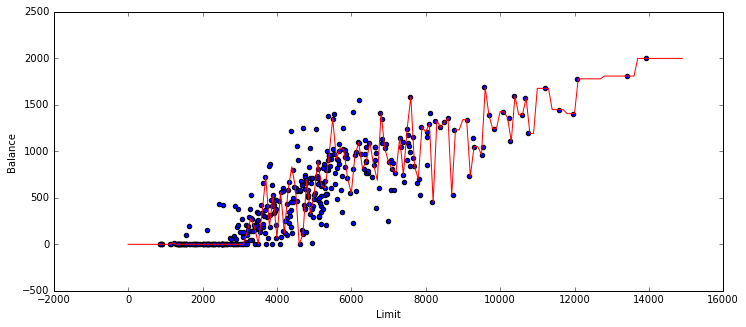

In [95]:
df.plot(kind='scatter', y='Balance', x='Limit', figsize=(12, 5))
plt.plot(x_evaluation, predictions, 'r-');

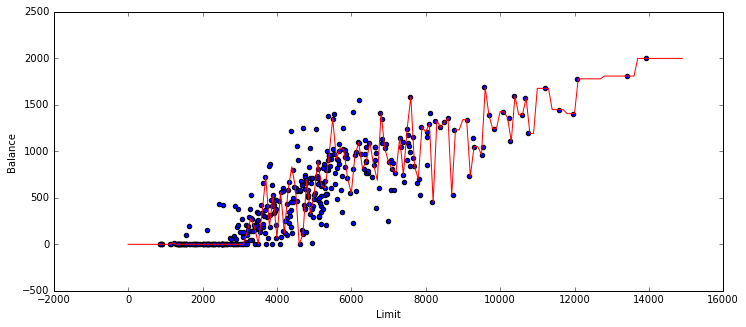

In [96]:
# Function to evaluate the threshold in Rating is dtr_rmodel
dtr_rmodel = DTR().fit(df[['Rating']], y)
x_eval = np.arange(0, 1000, 10)
r_predictions = [dtr_rmodel.predict(pred_val) for pred_val in x_eval]

df.plot(kind='scatter', y='Balance', x='Limit', figsize=(12, 5))
plt.plot(x_evaluation, predictions, 'r-');

In [97]:
r_threshold = x_eval[np.argwhere(np.array(r_predictions) > 0)[:, 0]]
r_threshold

array([190, 220, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340,
       350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470,
       480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600,
       610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730,
       740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860,
       870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])

In [137]:
r_threshold[np.argmin(r_threshold)]

190

### Evaluatin model

#### 'Limit'  

Feature threshold = 1200

#### 'Rating'

Feature threshold = 190


In [123]:
df_threshold = df[(df['Limit'] >= 1200) & (df['Rating'] >= 190)]

In [125]:
df_threshold[:2]

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,1,0,1,333,0,1
2,106.025,6645,483,3,82,15,0,1,1,903,1,0


In [126]:
Xop2 = df_threshold.drop(['Balance'], axis=1)

In [130]:
model_t = sm.OLS(df_threshold.Balance, sm.add_constant(Xop2)).fit()

In [131]:
model_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2850.
Date:                Tue, 10 Jul 2018   Prob (F-statistic):          5.43e-318
Time:                        14:22:37   Log-Likelihood:                -1774.8
No. Observations:                 340   AIC:                             3574.
Df Residuals:                     328   BIC:                             3620.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -619.9542     17.915    -34.606      0.000      -655.196  -584.712
Income                 -9.1423      0.116    -78.973      0.000        -9.370    -8.915
Limit                   0.3020      0.016     18.403      0.000         0.270     0.334
Rating                  0.0695      0.244      0.285      0.776        -0.410     0.549
Cards                  23.0129      2.098     10.971      0.000        18.887    27.139
Age                    -1.0846      0.147     -7.382      0.000        -1.374    -0.796
Education              -0.4927      0.796     -0.619      0.536        -2.058     1.072
Gender                 10.4176      4.966      2.098      0.037         0.648    20.187
Student               484.5696      8.414     57.593      0.000       468.018   501.121
Married                -0.3702      5.221     -0.071      0.944       -10.642     9.901
Ethnicity_Asian         8.5161      7.070      1.205      0.229        -5.392    22.424
Ethnicity_Caucasian     5.5148      6.045      0.912      0.362        -6.376    17.406
==============================================================================
Omnibus:                      239.911   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2614.479
Skew:                           2.902   Prob(JB):                         0.00
Kurtosis:                      15.282   Cond. No.                     4.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

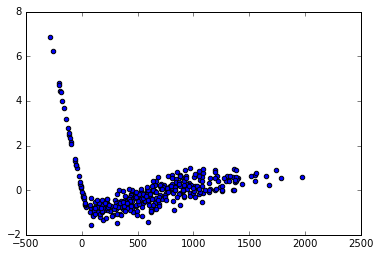

In [139]:
plt.scatter(model_t.fittedvalues, model_t.outlier_test().student_resid)

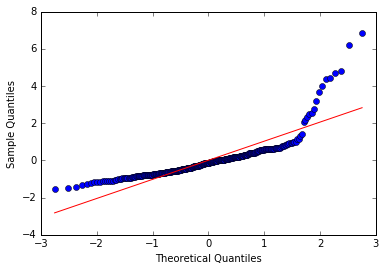

In [142]:
sm.qqplot(model_t.outlier_test().student_resid, line='s');

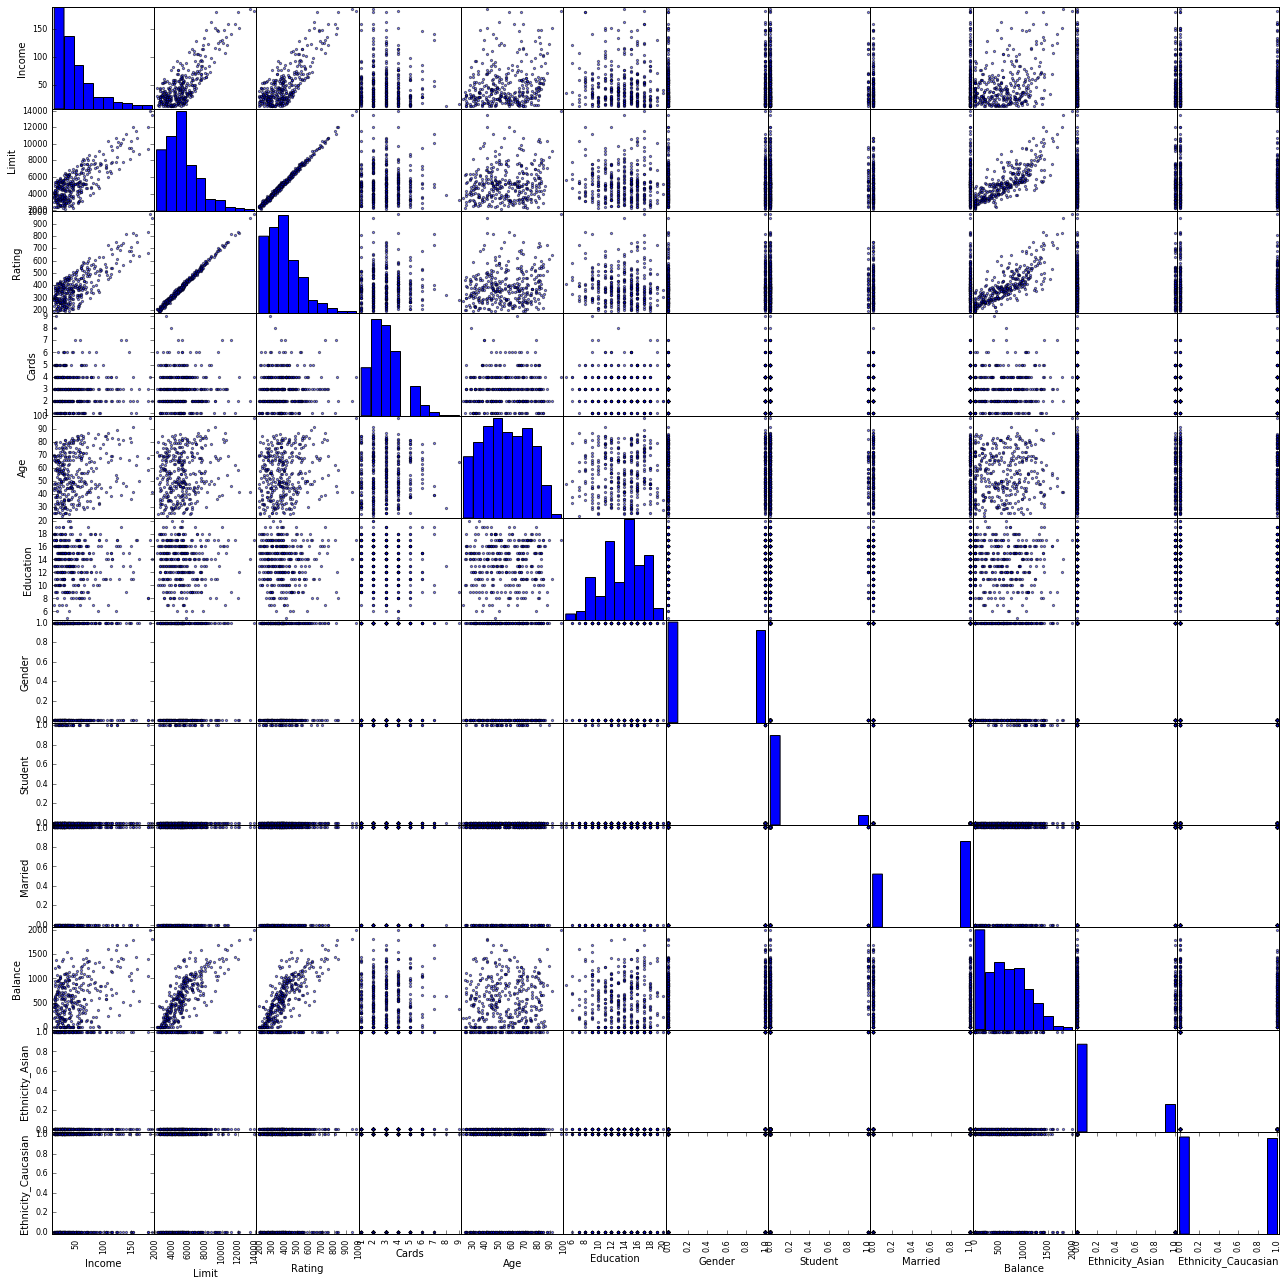

In [145]:
scatter_matrix(df_threshold, figsize=(22, 22));